<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,48.481650,37.293776,45.136774,51.712753,0.128149,192.753101,192.453082,0.300019
1,0.0,1.0,84.088126,46.317490,61.499743,56.864026,-0.545787,258.223597,258.676163,-0.452566
2,0.0,2.0,37.073327,44.663800,31.513034,85.051779,0.692578,208.994519,208.521094,0.473424
3,0.0,3.0,70.986771,98.809577,71.929248,40.896853,-0.569323,292.053126,292.143082,-0.089956
4,0.0,4.0,41.766080,20.801710,87.981283,22.727995,-0.824172,182.452896,182.845044,-0.392148
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.716878,43.795474,92.022872,81.890247,-0.417440,309.008033,309.469819,-0.461786
19996,999.0,16.0,73.295260,90.046240,80.564500,77.747321,-0.145492,331.507828,331.785955,-0.278127
19997,999.0,17.0,79.617727,86.096677,92.855938,41.125300,0.757603,310.453244,309.760816,0.692428
19998,999.0,18.0,58.394266,61.807039,69.408835,84.961710,0.033891,284.605740,284.601746,0.003995


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    48.481650  37.293776  45.136774  51.712753  0.128149  192.753101   
      1.0    84.088126  46.317490  61.499743  56.864026 -0.545787  258.223597   
      2.0    37.073327  44.663800  31.513034  85.051779  0.692578  208.994519   
      3.0    70.986771  98.809577  71.929248  40.896853 -0.569323  292.053126   
      4.0    41.766080  20.801710  87.981283  22.727995 -0.824172  182.452896   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   81.716878  43.795474  92.022872  81.890247 -0.417440  309.008033   
      16.0   73.295260  90.046240  80.564500  77.747321 -0.145492  331.507828   
      17.0   79.617727  86.096677  92.855938  41.125300  0.757603  310.453244   
      18.0   58.394266  61.807039  69.408835  84.961710  0.033891  284.605740   
      19.0   30.070187  48.056524  51.790934  87.646085 -0.089336  227.474394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    192.453082  0.300019  
      1.0    258.676163 -0.452566  
      2.0    208.521094  0.473424  
      3.0    292.143082 -0.089956  
      4.0    182.845044 -0.392148  
...                 ...       ...  
999.0 15.0   309.469819 -0.461786  
      16.0   331.785955 -0.278127  
      17.0   309.760816  0.692428  
      18.0   284.601746  0.003995  
      19.0   227.476764 -0.002370  

[20000 rows x 8 columns]

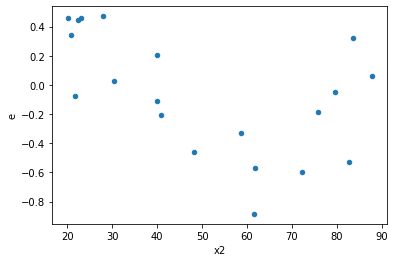

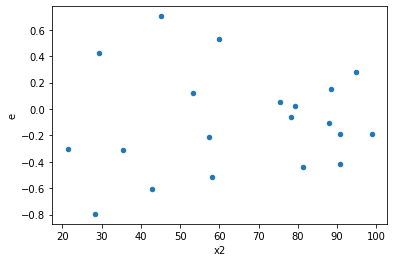

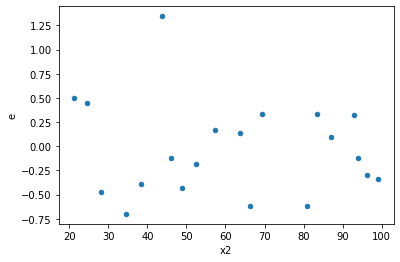

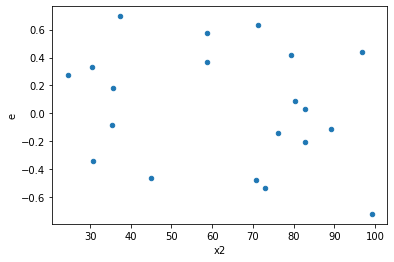

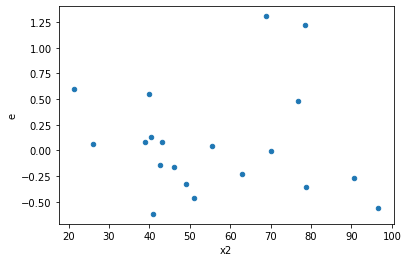

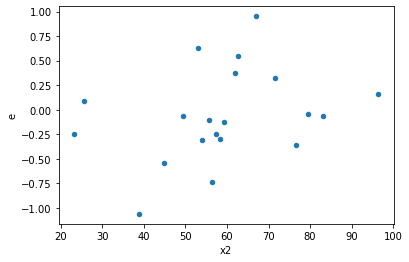

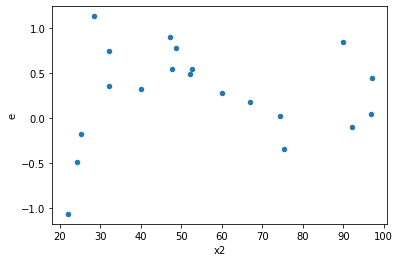

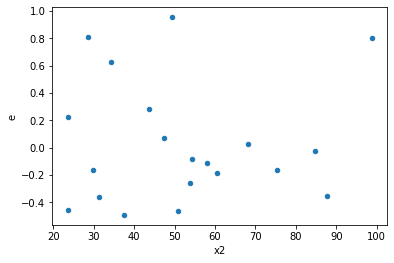

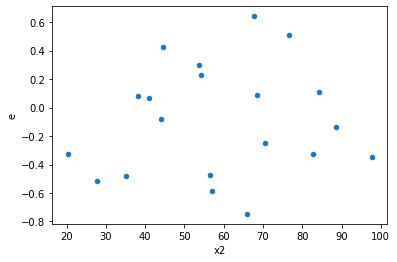

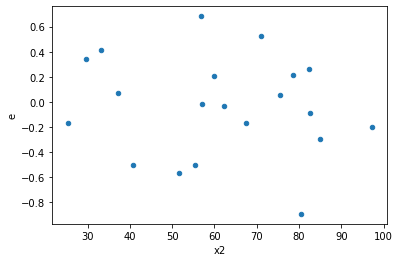

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,7.0,0.1432028430355464,0.7063425980640761,0.028640568607109278,0.10090608543772515,3.523187225154386,0.13102412267261987,0.9344879386636901,0.06551206133630993,Reject005=1 : Homoscedasticity
2.0,4.0,8.0,0.267407851376464,0.7516605753983449,0.066851962844116,0.0939575719247931,1.4054571911954388,0.6307104861870338,0.6846447569064831,0.3153552430935169,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.36940181113637593,1.1653878692338546,0.061566968522729325,0.19423131153897577,3.154797388915931,0.18787365507976928,0.9060631724601154,0.09393682753988464,Reject005=1 : Homoscedasticity
4.0,3.0,9.0,0.18230372539459827,3.4620550067823466,0.06076790846486609,0.38467277853137183,6.330196122411821,0.026904767338894464,0.9865476163305528,0.013452383669447232,Reject005=0 : Heteroscedasticity
6.0,4.0,8.0,0.15188361811366463,2.0386908306136253,0.03797090452841616,0.25483635382670317,6.711358525472896,0.02268000350498567,0.9886599982475072,0.011340001752492834,Reject005=0 : Heteroscedasticity
11.0,4.0,8.0,0.3162876901536837,1.3884257577834438,0.07907192253842092,0.17355321972293047,2.194877956060841,0.3196246521815882,0.8401876739092059,0.1598123260907941,Reject005=1 : Homoscedasticity
12.0,9.0,3.0,0.9173976516442394,1.4823878293790105,0.10193307240491549,0.49412927645967014,4.8475854283760595,0.22099526481593035,0.8895023675920348,0.11049763240796517,Reject005=1 : Homoscedasticity
13.0,2.0,10.0,0.02004962153984413,1.1312021014026015,0.010024810769922066,0.11312021014026015,11.28402448050793,0.005458474481788933,0.9972707627591055,0.0027292372408944665,Reject005=0 : Heteroscedasticity
15.0,5.0,7.0,1.2077683011877258,2.0016700600671213,0.24155366023754515,0.28595286572387446,1.183806800702862,0.8079308593581931,0.5960345703209035,0.40396542967909654,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,7.0,0.1432028430355464,0.7063425980640761,0.028640568607109278,0.10090608543772515,3.523187225154386,0.13102412267261987,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,1.7362528409731697,1.6639855757450432,0.2893754734955283,0.2773309292908405,0.958377453143506,0.9601615222309564,Reject005=1 : Homoscedasticity
2.0,4.0,8.0,0.267407851376464,0.7516605753983449,0.066851962844116,0.0939575719247931,1.4054571911954388,0.6307104861870338,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.36940181113637593,1.1653878692338546,0.061566968522729325,0.19423131153897577,3.154797388915931,0.18787365507976928,Reject005=1 : Homoscedasticity
4.0,3.0,9.0,0.18230372539459827,3.4620550067823466,0.06076790846486609,0.38467277853137183,6.330196122411821,0.026904767338894464,Reject005=0 : Heteroscedasticity
5.0,8.0,4.0,0.5301487911980907,0.08261705555437057,0.06626859889976133,0.020654263888592643,0.311674974746856,0.15062326664351752,Reject005=1 : Homoscedasticity
6.0,4.0,8.0,0.15188361811366463,2.0386908306136253,0.03797090452841616,0.25483635382670317,6.711358525472896,0.02268000350498567,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,1.54052081217807,0.257039652607841,0.256753468696345,0.04283994210130684,0.16685243754962628,0.04665109557183619,Reject005=0 : Heteroscedasticity
8.0,8.0,4.0,1.686098848151968,0.42835796359185496,0.210762356018996,0.10708949089796374,0.5081053985196092,0.3851310905594662,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      716
Reject005=0 : Heteroscedasticity    284
Name: Result_test, dtype: int64